In [202]:
# import necessory library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
sns.set_style("whitegrid")

In [203]:
train_df = pd.read_csv('digit_train.csv')  # data frame formation
test_df = pd.read_csv('digit_test.csv')

In [204]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
train_df.shape

(42000, 785)

In [207]:
test_df.shape

(28000, 784)

In [208]:
train = np.array(train_df,dtype='float32') # create array formation ( matrix formation)
test = np.array(test_df,dtype='float32')

In [209]:
train.shape

(42000, 785)

In [210]:
test.shape

(28000, 784)

In [211]:
train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [7., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [212]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [213]:
 train_df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

Text(0.5, 1.0, '(class_namess[label_index])')

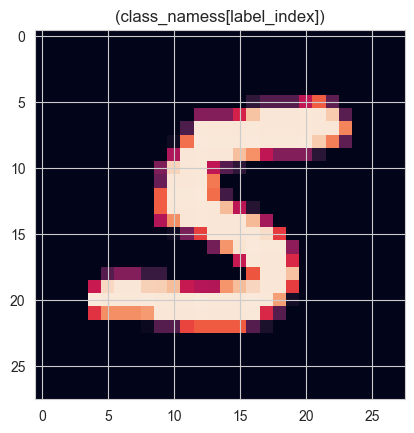

In [214]:
# visualization of data sets - EDA
class_names =[1,0,4,7,3,5,9,2,6]   
i = random.randint(1,42000)
plt.imshow(train[i,1:].reshape((28,28)))
label_index = train_df['label'][i]
plt.title(f'(class_namess[label_index])')

In [215]:
label =train[i,0]
label

5.0

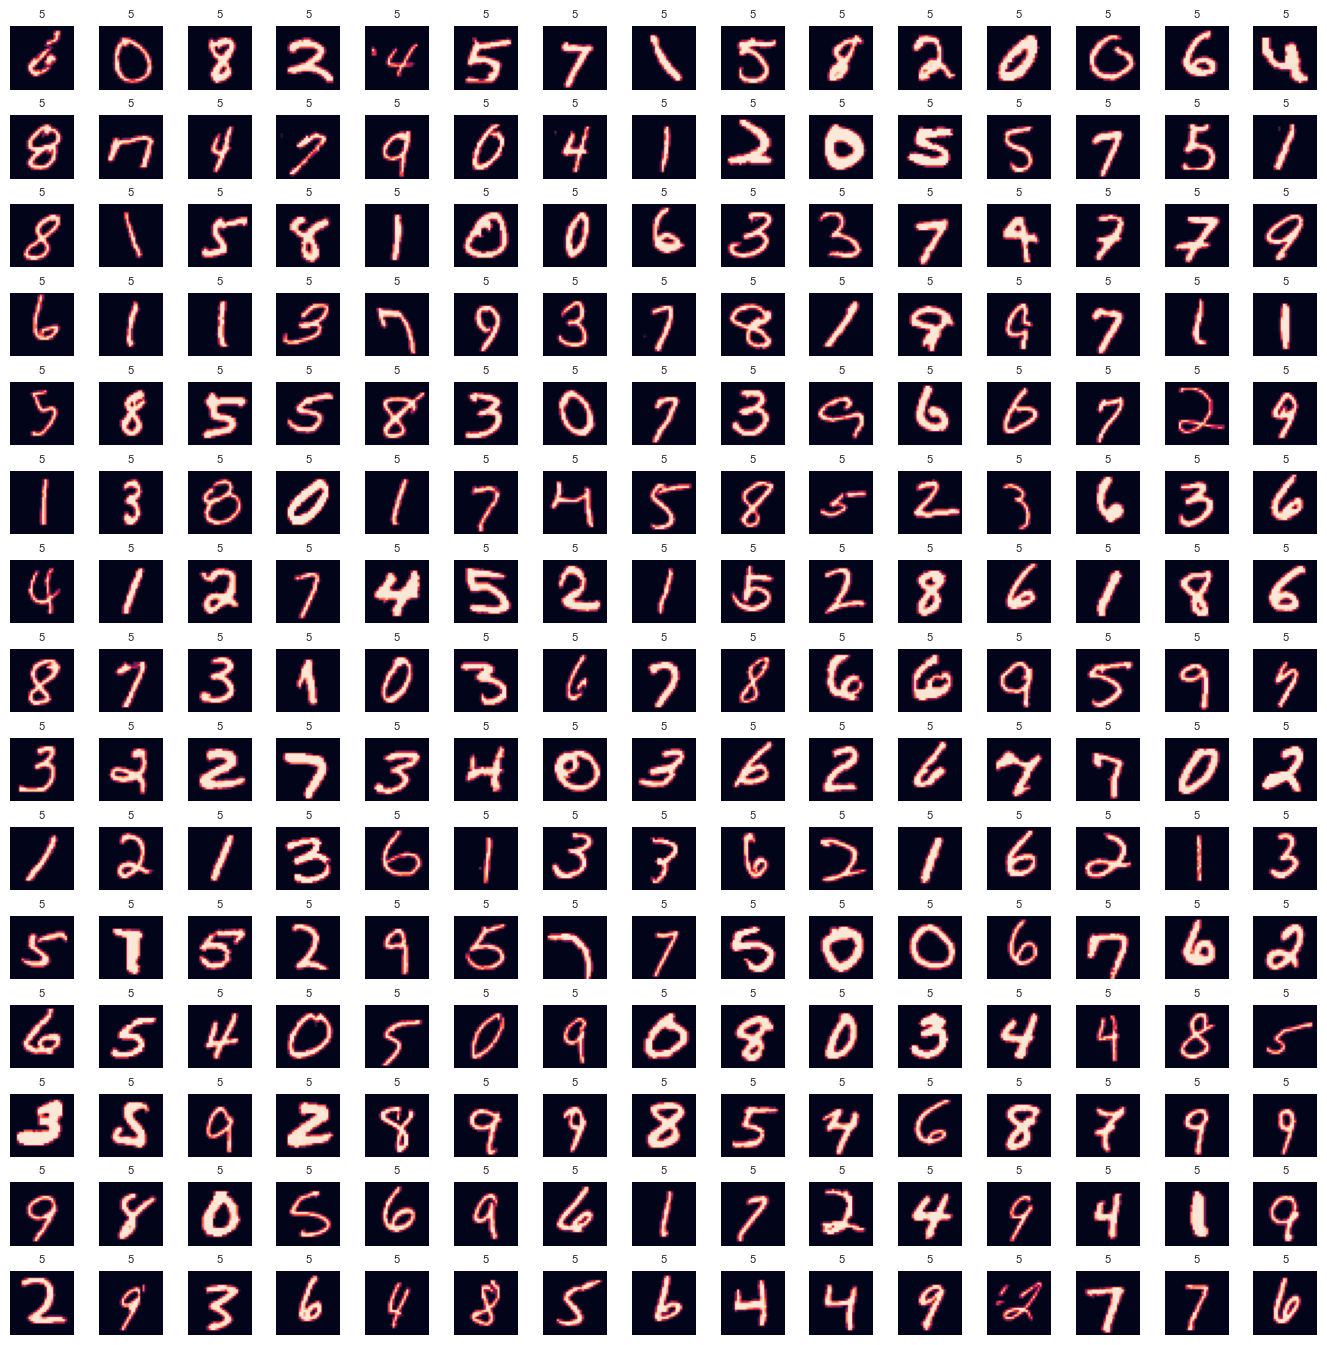

In [216]:
W_grid = 15
L_grid = 15
fig,axes = plt.subplots(L_grid,W_grid,figsize=(17,17)) # subplot creation
axes = axes.ravel()
n_train =len(train)
for i in np.arange(0,W_grid*L_grid): 
    index=np.random.randint(0,n_train)
    axes[i].imshow(train[index,1:].reshape(28,28))
    axes[i].set_title(class_names[label_index],fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [217]:
X_train =train[:,1:]/255 # X,y splitting and scaling
y_train=train[:,0]
X_test = test[:,0:]/255
y_test=train[:,0]


In [218]:
from sklearn.model_selection import train_test_split    
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [219]:
# train and test data sets convert into same shape
X_train = X_train.reshape(X_train.shape[0],*(28,28,1)) 
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [220]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)


(33600, 28, 28, 1)
(33600,)
(8400, 28, 28, 1)
(8400,)


In [221]:
import keras      # important library for cnn
import tensorflow as tf

In [222]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [223]:
cnn_model = Sequential() # object creation
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu',padding='same'))#convelutional procee
cnn_model.add(BatchNormalization()) # scaling
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu',padding='same'))#convelutional proces
cnn_model.add(BatchNormalization())# scaling
cnn_model.add(MaxPooling2D(pool_size=(2,2)))# maxpooling kernel slide through image matrix
cnn_model.add(Dropout(0.2)) # help to avoid over fitting

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28,28,1),activation='relu',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28,28,1),activation='relu',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.2))


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [224]:
cnn_model.add(Flatten()) # 2D convert into 1D array
cnn_model.add(Dense(units=128,activation='relu')) # ANN layer 
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=10, activation='softmax')) # output layer

In [225]:
metrics = ['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [230]:
cnn_model.build()
cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,404,992 (5.36 MB)

 Trainable params: 468,202 (1.79 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 936,406 (3.57 MB)

In [227]:
epochs = 10
batch_size = 512
his = cnn_model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_validate,y_validate))

Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.5753 - loss: 2.0276 - val_accuracy: 0.1087 - val_loss: 2.5621
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9456 - loss: 0.1854 - val_accuracy: 0.1118 - val_loss: 3.1985
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9667 - loss: 0.1063 - val_accuracy: 0.2104 - val_loss: 3.0536
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.9767 - loss: 0.0769 - val_accuracy: 0.3817 - val_loss: 2.1666
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9803 - loss: 0.0653 - val_accuracy: 0.6886 - val_loss: 0.9222
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9841 - loss: 0.0528 - val_accuracy: 0.8437 - val_loss: 0.4892
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9867 - loss: 0.0432 - val_accuracy: 0.9589 - val_loss: 0.1425
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9882 - loss: 0.0390 - val_accuracy: 0.9796 - v

In [232]:
y_pred = cnn_model.predict(X_validate)
y_pred

263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step


array([[7.54617167e-06, 4.43432509e-06, 5.40697192e-06, ...,
        5.17253724e-08, 9.99976754e-01, 2.27652322e-06],
       [5.73406105e-08, 9.99998569e-01, 1.19068675e-08, ...,
        1.04884418e-06, 1.63834779e-09, 1.46678591e-09],
       [3.58027634e-08, 9.24325363e-08, 2.06042444e-07, ...,
        6.51035079e-05, 2.05102901e-06, 9.99919891e-01],
       ...,
       [4.79446066e-11, 7.16775483e-09, 1.62629919e-06, ...,
        3.88242505e-09, 8.92985099e-08, 1.66057159e-08],
       [9.99858141e-01, 2.18932584e-07, 8.14013310e-06, ...,
        4.11038400e-07, 9.30152098e-08, 1.02880469e-04],
       [3.00182205e-06, 1.73445144e-07, 6.58028466e-06, ...,
        5.92490651e-05, 3.80776305e-06, 9.99880075e-01]], dtype=float32)

In [233]:
y_validate

array([8., 1., 9., ..., 3., 0., 9.], dtype=float32)